In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os,keras

In [3]:
# Define paths to your dataset
train_dir = r"train"
test_dir = r"test"


In [4]:
# Image dimensions
image_height = 150
image_width = 150

In [5]:
# Define data generators for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load and preprocess training and testing data using data generators
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_height, image_width),
        batch_size=32,
        class_mode='binary')    

Found 7017 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [7]:
print("Number of training samples:", train_generator.samples)
print("Number of testing samples:", test_generator.samples)


Number of training samples: 7017
Number of testing samples: 1600


In [8]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [9]:
print(train_generator.filenames)
print(test_generator.filenames)

['Seat_Belt\\seatbelt 1000.jpg', 'Seat_Belt\\seatbelt 1001.jpg', 'Seat_Belt\\seatbelt 1002.jpg', 'Seat_Belt\\seatbelt 1003.jpg', 'Seat_Belt\\seatbelt 1004.jpg', 'Seat_Belt\\seatbelt 1005.jpg', 'Seat_Belt\\seatbelt 1006.jpg', 'Seat_Belt\\seatbelt 1007.jpg', 'Seat_Belt\\seatbelt 1008.jpg', 'Seat_Belt\\seatbelt 1009.jpg', 'Seat_Belt\\seatbelt 1010.jpg', 'Seat_Belt\\seatbelt 1011.jpg', 'Seat_Belt\\seatbelt 1012.jpg', 'Seat_Belt\\seatbelt 1013.jpg', 'Seat_Belt\\seatbelt 1014.jpg', 'Seat_Belt\\seatbelt 1015.jpg', 'Seat_Belt\\seatbelt 1016.jpg', 'Seat_Belt\\seatbelt 1017.jpg', 'Seat_Belt\\seatbelt 1018.jpg', 'Seat_Belt\\seatbelt 1019.jpg', 'Seat_Belt\\seatbelt 1020.jpg', 'Seat_Belt\\seatbelt 1021.jpg', 'Seat_Belt\\seatbelt 1022.jpg', 'Seat_Belt\\seatbelt 1023.jpg', 'Seat_Belt\\seatbelt 1024.jpg', 'Seat_Belt\\seatbelt 1025.jpg', 'Seat_Belt\\seatbelt 1026.jpg', 'Seat_Belt\\seatbelt 1027.jpg', 'Seat_Belt\\seatbelt 1028.jpg', 'Seat_Belt\\seatbelt 1029.jpg', 'Seat_Belt\\seatbelt 1030.jpg', 'Seat_B

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
# Define checkpoint to save model after each epoch
checkpoint_filepath = 'model_checkpoint2.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Save entire model
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)  # Save only the best model

In [30]:
# Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // 32,
        epochs=40,
        validation_data=test_generator,
        validation_steps=test_generator.samples // 32,
        callbacks=[model_checkpoint_callback])

Epoch 1/40


219/219 [==============================] - 157s 709ms/step - loss: 0.0513 - accuracy: 0.9802 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 2/40
219/219 [==============================] - 105s 480ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0137 - val_accuracy: 0.9969
Epoch 3/40
219/219 [==============================] - 115s 525ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0114 - val_accuracy: 0.9981
Epoch 4/40
219/219 [==============================] - 108s 494ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0807 - val_accuracy: 0.9856
Epoch 5/40
219/219 [==============================] - 109s 497ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0253 - val_accuracy: 0.9919
Epoch 6/40
219/219 [==============================] - 105s 480ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0837 - val_accuracy: 0.9856
Epoch 7/40
219/219 [==============================] - 100s 457ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0732

In [13]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

50/50 [==============================] - 6s 122ms/step


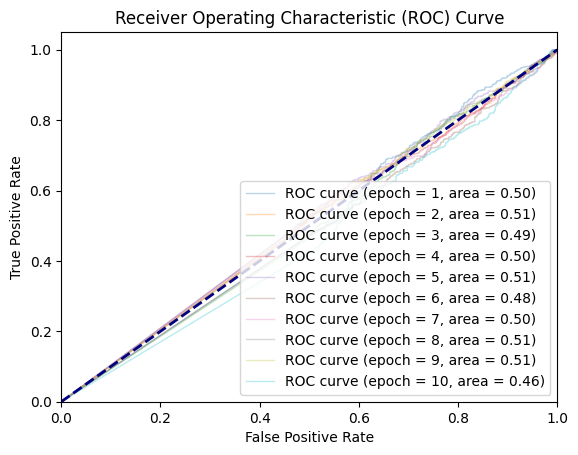

In [13]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the saved models from each epoch and evaluate them
roc_aucs = []
for epoch in range(1, 11):  # Assuming you saved models for 10 epochs
    model_path = f'model_checkpoint2.keras'  # Adjust the filename pattern accordingly
    loaded_model = load_model(model_path)
    
    # Make predictions on the test set
    predictions = loaded_model.predict(test_generator).ravel()

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(test_generator.classes, predictions)

    # Compute area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC curve (epoch = %d, area = %0.2f)' % (epoch, roc_auc))

# Plot the average ROC curve
mean_auc = sum(roc_aucs) / len(roc_aucs)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [14]:
# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)



50/50 [==============================] - 6s 118ms/step - loss: 0.0019 - accuracy: 0.9994
Test accuracy: 0.9993749856948853


In [16]:
saved_model_path = 'model_checkpoint2.keras'  # Path where the model was saved
loaded_model = load_model(saved_model_path)

# Function to preprocess an image for prediction
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Test image file path
test_image_path = 'seatbelt 765.jpg'  # Provide the path to your test image

# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path, target_size=(150, 150))

# Make prediction
prediction = loaded_model.predict(preprocessed_image)

# Classify the prediction
if prediction[0][0] > 0.5:
    print("Prediction: Class 1 no")
else:
    print("Prediction: Class 0 yes")

1/1 [==============================] - 0s 78ms/step
Prediction: Class 0 yes


In [18]:
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
saved_model_path = 'model_checkpoint2.keras'
loaded_model = load_model(saved_model_path)

# Function to preprocess an image for prediction
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img.size[::-1]  # Return image array and image size

# Create a directory to save the annotated images
output_dir = "annotated_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for img in os.listdir("testphotos"):
    test_image_path = "testphotos/" + img

    # Preprocess the test image
    preprocessed_image, original_image_size = preprocess_image(test_image_path, target_size=(150, 150))

    # Make prediction
    prediction = loaded_model.predict(preprocessed_image)

    # Classify the prediction
    class_label = "Class 1 (No)" if prediction[0][0] > 0.7 else "Class 0 (Yes)"

    # Read the original image
    original_image = cv2.imread(test_image_path)

    # Resize original image to a larger size
    resized_image = cv2.resize(original_image, (500, 500))

    # Define the box size
    box_width = 100
    box_height = 50

    # Calculate box position
    box_x = 50
    box_y = resized_image.shape[0] - 100

    # Determine color based on class label
    color = (0, 255, 0) if class_label == "Class 0 (Yes)" else (0, 0, 255)

    # Draw bounding box and label
    cv2.rectangle(resized_image, (box_x, box_y), (box_x + box_width, box_y + box_height), color, 2)
    cv2.putText(resized_image, class_label, (box_x + 10, box_y + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Save the annotated image
    annotated_image_path = os.path.join(output_dir, img)
    cv2.imwrite(annotated_image_path, resized_image)

    print(f"Annotated image saved: {annotated_image_path}")

print("All images annotated and saved.")


1/1 [==============================] - 0s 80ms/step
Annotated image saved: annotated_images\.517.jpg
1/1 [==============================] - 0s 24ms/step
Annotated image saved: annotated_images\.542.jpg
1/1 [==============================] - 0s 20ms/step
Annotated image saved: annotated_images\.545.jpg
1/1 [==============================] - 0s 20ms/step
Annotated image saved: annotated_images\.565.jpg
1/1 [==============================] - 0s 30ms/step
Annotated image saved: annotated_images\.639.jpg
1/1 [==============================] - 0s 30ms/step
Annotated image saved: annotated_images\seatbelt 13.jpg
1/1 [==============================] - 0s 19ms/step
Annotated image saved: annotated_images\seatbelt 23.jpg
1/1 [==============================] - 0s 21ms/step
Annotated image saved: annotated_images\seatbelt 36.jpg
1/1 [==============================] - 0s 20ms/step
Annotated image saved: annotated_images\seatbelt 52.jpg
All images annotated and saved.
